<a href="https://colab.research.google.com/github/aka-hombre/MAT421/blob/main/HWCH19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HW Module C: Section 19.1, 19,2, 19.3, 19.4 19.5**#

## Root finding:##

We are well aware of what finding a root of a function, such that for a function $f(x)$ the roots are all $x_r$ that satisfy $f(x_r)=0$. For elementry functions this seems trivial; however, for more complex problems modeled by functions, finding the roots analytically may be more difficult. This is where approximation comes into play.

Let's try to find the roots of a function where the analytic solution to find roots is not so clear: $f(x)=sin(x)-x$, near $\pi$

In [1]:
import numpy as np
from scipy import optimize

f = lambda x: np.sin(x) - x
r = optimize.fsolve(f, np.pi)
print("r =", r)

# Verify the solution is a root
result = f(r)
print("result=", result)

r = [1.94614787e-08]
result= [0.]


If we notice there only exists a root at zero for f(x).

Now let's see how this hold up to another function $f(x)=sin(x)-2$

r= [1.94614787e-08]
result= [0.]


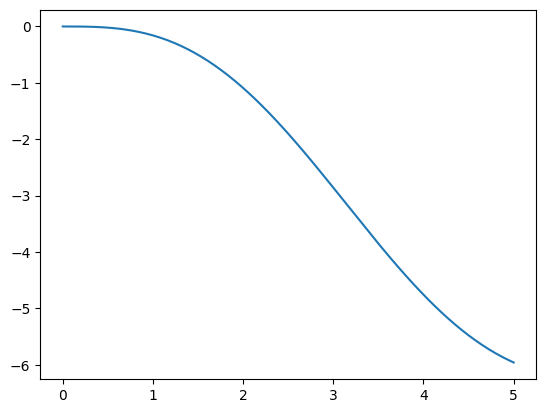

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

f = lambda x: np.sin(x) - x
r = optimize.fsolve(f, np.pi)
print("r=", r)

xx=np.linspace(0,5,200)
plt.plot(xx,f(xx))
result = f(r)
print("f(root_value)=", result)

Notice how this is not too precise.

##Tolerance & Bisection:##

When we have to approximate solutions (roots), error is a measure of how far off we are from an expected or computed value. **Tolerance** is the level of acceptable error.

Convergance happens when our computed solution has an error smaller than the tolerance. The bisection method uses itteration and the Intermediate Value Theorem to find roots.


1st root (tol=0.001) = 2.2360610961914062
2nd root (tol=0.01) = -2.236328125
f(r1) = -3.077409928664565e-05
f(r2) = 0.001163482666015625


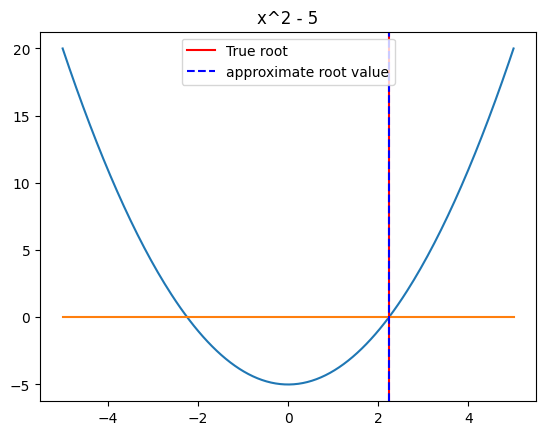

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def my_bisection(f, a, b, tol):
    # approximates a root, R, of f bounded
    # by a and b to within tolerance
    # | f(m) | < tol with m the midpoint
    # between a and b Recursive implementation

    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")

    # get midpoint
    m = (a + b)/2

    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a.
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b.
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)


f = lambda x: x**2 - 5

r1 = my_bisection(f, 0, 5, 0.0001)
print("1st root (tol=0.001) =", r1)
r01 = my_bisection(f, -5, 0, 0.01)
print("2nd root (tol=0.01) =", r01)

print("f(r1) =", f(r1))
print("f(r2) =", f(r01))

xx=np.linspace(-5,5,200)
plt.title("x^2 - 5")
plt.plot(xx,f(xx))
plt.plot(xx, [0]*xx)
plt.axvline(x=np.sqrt(5), color ='r', label = "True root")
plt.axvline(x=r1, color = 'b', linestyle='dashed', label = "approximate root value")
plt.legend(loc='upper center')


##Newton-Raphson Method:##

This method of approximating roots involves beining with a guesss $x_o$ which approximates $x_r$, and itterates, in Newton steps, until we find an approximation that has an error less than the tolerance.


In [21]:
import numpy as np

f = lambda x: x**2 - 5
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(5) =", np.sqrt(5))

newton_raphson = 2.4857142857142858
sqrt(5) = 2.23606797749979


##Using Python:##

We will use f-solve to find the root of $f(x)=x^2 -5$

In [26]:
from scipy.optimize import fsolve

f = lambda x: x**2 -5

fsolve(f, [0, 5])

array([-2.23606798,  2.23606798])